In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("/content/Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.agg(['min', 'max'])

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
min,1,290,92,1,1.0,1.0,6.80,0,0.34
max,500,340,120,5,5.0,5.0,9.92,1,0.97


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.drop(columns={"Serial No."},inplace=True)

In [8]:
df.sample()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
159,297,100,1,1.5,2.0,7.9,0,0.52


In [9]:
X=df.drop(columns={"Chance of Admit "})
y=df["Chance of Admit "]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler=MinMaxScaler()

In [13]:
xtrain_transformed=scaler.fit_transform(X_train)

In [14]:
xtest_transformed=scaler.transform(X_test)

In [15]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1


In [16]:
xtrain_transformed[:5]

array([[0.62      , 0.67857143, 0.5       , 0.625     , 0.71428571,
        0.65064103, 1.        ],
       [0.52      , 0.67857143, 0.75      , 0.75      , 1.        ,
        0.55769231, 0.        ],
       [0.26      , 0.35714286, 0.5       , 0.625     , 0.42857143,
        0.54487179, 0.        ],
       [0.48      , 0.53571429, 0.25      , 0.375     , 0.71428571,
        0.47115385, 0.        ],
       [0.36      , 0.5       , 0.5       , 0.625     , 0.28571429,
        0.45192308, 1.        ]])

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model=Sequential()

In [23]:
model.add(Dense(7,activation="relu",input_dim=7))
model.add(Dense(1,activation="linear"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
from sklearn.metrics import r2_score

In [29]:
model.compile(loss="mean_squared_error",optimizer="Adam")

In [30]:
history=model.fit(xtrain_transformed,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1346 - val_loss: 0.1091
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0884 - val_loss: 0.0705
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0560 - val_loss: 0.0445
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0391 - val_loss: 0.0300
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0229 - val_loss: 0.0244
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0229 - val_loss: 0.0229
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0231 - val_loss: 0.0222
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0227 - val_loss: 0.0209
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0160 - val_loss: 0.0200
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0164 - val_loss: 0.0192


In [31]:
y_pred=model.predict(xtest_transformed)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [32]:
y_pred

array([[0.9767802 ],
       [0.65188664],
       [0.7347909 ],
       [0.7469165 ],
       [0.7709794 ],
       [0.8060107 ],
       [0.30643266],
       [0.72937435],
       [0.68309814],
       [0.9283846 ],
       [0.76083493],
       [0.74418116],
       [0.6304137 ],
       [1.0412718 ],
       [0.7356687 ],
       [0.40628177],
       [0.8397674 ],
       [0.22880232],
       [0.5281236 ],
       [0.6024848 ],
       [0.70148265],
       [0.50424093],
       [0.41506758],
       [0.8112592 ],
       [0.78457505],
       [0.44398758],
       [1.0798469 ],
       [0.7451103 ],
       [0.5954791 ],
       [0.5950395 ],
       [0.44666553],
       [0.9003531 ],
       [0.5694017 ],
       [0.83770627],
       [0.6538781 ],
       [0.70078105],
       [0.33143896],
       [1.0305617 ],
       [0.45304587],
       [0.4638736 ],
       [0.95373166],
       [0.2668729 ],
       [0.55977464],
       [0.8216242 ],
       [1.0648693 ],
       [0.3871955 ],
       [1.0068127 ],
       [0.864

In [33]:
r2_score(y_test,y_pred)

0.022689568779920233

In [34]:
import matplotlib.pyplot as plt

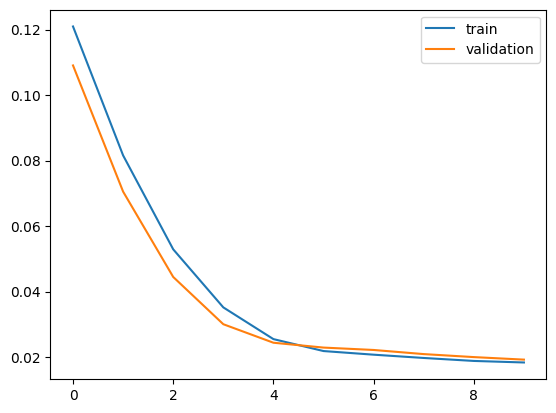

In [35]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train","validation"])
plt.show()